In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 2: Load the Dataset

df = pd.read_csv('house.csv')
display(df.head())

,Area,Bedrooms,Bathrooms,Material,Locality,Price
0,1790,2,2,Concrete,Riverside,114300
1,2030,4,2,Concrete,Riverside,114200
2,1740,3,2,Concrete,Riverside,114800
3,1980,3,2,Concrete,Riverside,94700
4,2130,3,3,Concrete,Riverside,119800


In [3]:
# Step 3: Choose Feature and Target

X = df[['Area']]
y = df['Price']

Here 25% of data will be used for test, and 75% of data will be used for training the model

Train is in two parts - input(X_train) and output(y_train)
Test is also in two parts - input(X_test) and output(y_train)

In [4]:
# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [5]:
print(f"Total data: {y.shape}")
print(f"Total features: {X_train.shape}")
print(f"Total Test: {X_test.shape}")

Total data: (128,)
Total features: (96, 1)
Total Test: (32, 1)


In [6]:
# Step 5: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
model.coef_ # this is the first parameter i.e, w

array([74.92694108])

In [8]:
model.intercept_ # this is the second parameter i.e, b

np.float64(-18984.40156145548)

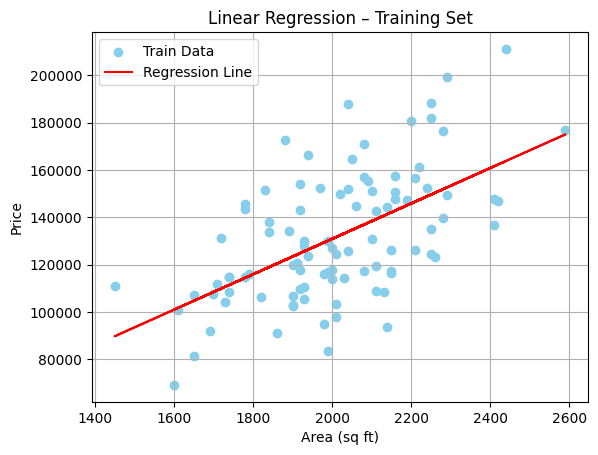

In [9]:
# Step 6: Plot Regression Line on Training Data

plt.scatter(X_train, y_train, color='skyblue', label='Train Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Linear Regression – Training Set')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Step 7: Assess Accuracy on Train and Test Sets

# On Train data
# At the time of prediction we DO NOT GIVE THE OUTPUT
train_preds = model.predict(X_train)
print("Train R² Score: ", r2_score(y_train, train_preds))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, train_preds)))
# On Test Data
test_preds = model.predict(X_test)
print("Test R² Score:", r2_score(y_test, test_preds))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, test_preds)))

Train R² Score:  0.32875680616329306
Train RMSE:  22362.946915128254
Test R² Score: 0.19464215306124666
Test RMSE: 22219.314632146063


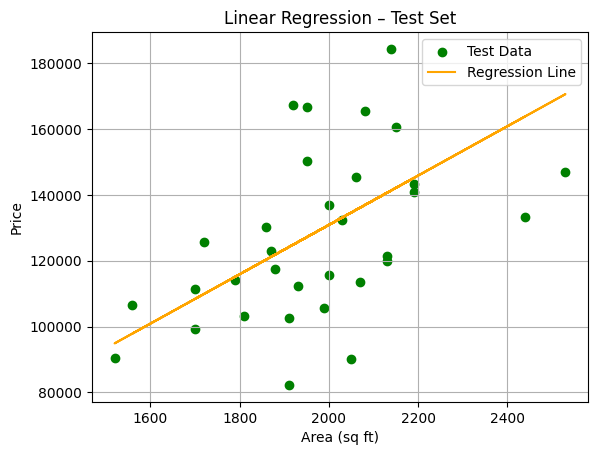

In [11]:
# Step 8: Plot Regression Line on Test Data
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, test_preds, color='orange', label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Linear Regression – Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Use Model on Test Data
# Predict house prices using test inputs
y_pred = model.predict(X_test)

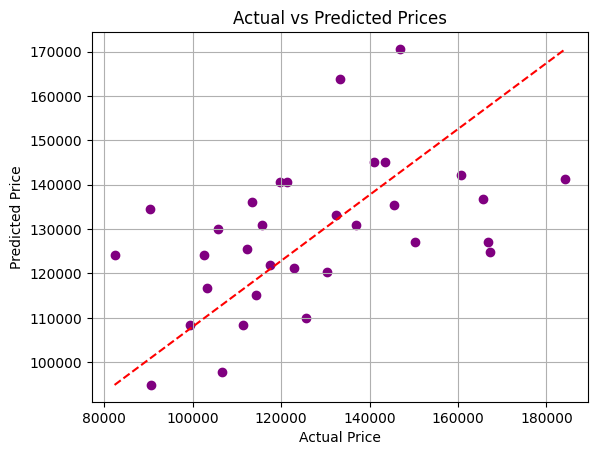

In [13]:
# Actual vs Predicted Prices (Scatter Plot)
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red',linestyle='--') # Ideal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

In [14]:
# Model Summary
# R² Score, Coefficient and Intercept

# R²

r2 = r2_score(y_test, y_pred)
print(f"R² Score on Test Data: {r2:.2f}")

R² Score on Test Data: 0.19


In [15]:
# Coefficient and Intercept
print(f"Model Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")


Model Coefficient (slope): 74.93
Model Intercept: -18984.40


```lua
[[7200]]
^   ^
|   └ column values
└ row
```

In [25]:
# Unseen new data
new_data = pd.DataFrame([[7200]],
                        columns=['Area'])
prediction = model.predict(new_data)
print(f"Predicted price: {prediction[0]:.2f}")

Predicted price: 520489.57
